In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
from random import random 
sp.init_printing()
import math
import timeit


t, x, z = sp.symbols('t, x, z')
h = sp.symbols('h')
y0 = sp.symbols('y_0')


In [2]:
def f(t,z):
    return (t-z)/2

In [3]:
a = 0; b = 1;   # extremos inferior y superior del intervalo 
ya = 1          # condición inicial del PVI

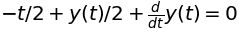

In [4]:
#Hallamos la solución exacta

y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)

In [5]:
edo_sol = sp.dsolve(edo)
edo_sol

In [6]:
ics = {y(0): y0} 
ics

In [7]:
edo_sol.rhs.subs(t, 0),edo_sol.lhs.subs(t, 0).subs(ics)

In [8]:
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
CI_eq   

In [9]:
CI_sol = sp.solve(CI_eq) 
CI_sol[0]                

In [10]:
edo_sol  

In [11]:
edo_sol.subs(CI_sol[0]) 

In [12]:
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})


In [13]:
'''EULER MEJORADO / PUNTO MEDIO'''
def PtoMedio(F,a,b,x0,h):

    N = int((b-a)/h)

    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)
    
    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)
    
    for i in range(N):
        xn[i+1] = xn[i] + h*F(tn[i]+h/2,xn[i]+(h/2)*F(tn[i],xn[i]))

    valores_exactos = np.array([sol_exacta.subs({t:tn[n]}) for n in range(len(xn))])
    
    diferencias = []
    for i in range (N+1):
        diferencias.append(abs(valores_exactos[i]-xn[i]))
        
    return tn,xn,diferencias
    

In [14]:
a = 0
b = 1
x0 = 1
h = 0.1
tnPtoMedio, xnPtoMedio, difPtoMedio = PtoMedio(f,a,b,x0,h)

In [15]:
'''EULER MODIFICADO / HEUN'''

def Heun(F,a,b,x0,h):

    N = int((b-a)/h)

    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)
    
    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)
    
    
    for i in range(N):
        xn[i+1] = xn[i] + (h/2)*(F(tn[i],xn[i])+F(tn[i+1],xn[i]+h*F(tn[i],xn[i])))
    
    valores_exactos = np.array([sol_exacta.subs({t:tn[n]}) for n in range(len(xn))])
    
    diferencias = []
    for i in range (N+1):
        diferencias.append(abs(valores_exactos[i]-xn[i]))
        
    return tn,xn,diferencias

In [16]:
a = 0
b = 1
x0 = 1
h = 0.1
tnHeun, xnHeun, difHeun = Heun(f,a,b,x0,h)

In [17]:
#Modificamos para obtener RungeKutta con 2 evaluaciones en función de alpha y beta

'''RUNGE-KUTTA 2 EVALUACIONES'''

def RK2(F,alpha,beta,a,b,x0,h):

    N = int((b-a)/h)

    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)

    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)

    for i in range(N):
        K1 = F(tn[i],xn[i])
        K2 = F(tn[i]+beta*h, xn[i]+h*beta*K1)

        xn[i+1] = xn[i] + h*((1-alpha)*K1 + alpha*K2)

    valores_exactos = np.array([sol_exacta.subs({t:tn[n]}) for n in range(len(xn))])
    
    diferencias = []
    for i in range (N+1):
        diferencias.append(abs(valores_exactos[i]-xn[i]))
        
    return tn,xn,diferencias

In [18]:
#En este caso, alpha = 3/4 y beta = 2/3

a = 0
b = 1
x0 = 1
h = 0.1

tnRK, xnRK, difRK = RK2(f,3/4,2/3,a,b,x0,h)


In [19]:
N = int((b-a)/h)
for i in range (N+1):
    difPtoMedio[i] = float(difPtoMedio[i])
    difHeun[i] = float(difHeun[i])
    difRK[i] = float(difRK[i])

In [20]:
for i in range(N+1):
    print(difPtoMedio[i],"\t",difHeun[i],"\t",difRK[i])

0.0 	 0.0 	 0.0
6.172649785796125e-05 	 6.172649785796125e-05 	 6.172649785796125e-05
0.00011743339212144654 	 0.00011743339212144654 	 0.00011743339212144654
0.0001675609592013405 	 0.0001675609592013405 	 0.0001675609592013405
0.00021252085150380573 	 0.00021252085150380573 	 0.00021252085150380573
0.0002526978420688275 	 0.0002526978420688275 	 0.0002526978420688275
0.00028845146713607495 	 0.00028845146713607495 	 0.00028845146713607495
0.000320117572425338 	 0.000320117572425227 	 0.000320117572425338
0.000348009768630142 	 0.00034800976863003097 	 0.000348009768630142
0.0003724208012952923 	 0.0003724208012951813 	 0.0003724208012952923
0.00039362383996743855 	 0.0003936238399673275 	 0.00039362383996743855


In [21]:
print("Max Pto Medio:")
print(np.amax(difPtoMedio))

print("\nMax Heun:")
print(np.amax(difHeun))

print("\nMax Runge Kutta:")
print(np.amax(difRK))

Max Pto Medio:
0.00039362383996743855

Max Heun:
0.0003936238399673275

Max Runge Kutta:
0.00039362383996743855
